Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

Data collection and processing

In [ ]:
#loading the csv data to a pandas Dataframe
heart_data = pd.read_csv('/content/heart.csv')

In [ ]:
# number of rows and columns of the dataset
heart_data.shape

(1025, 14)

In [ ]:
# getting info about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# print the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print the last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
# Checking any rows are duplicated or not
print(heart_data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [ ]:
# drop those duplicated rows
heart_data.drop_duplicates(inplace=True)

In [ ]:
# number of rows and columns of the dataset
heart_data.shape

(302, 14)

In [ ]:
print(heart_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
723    False
733    False
739    False
843    False
878    False
Length: 302, dtype: bool


In [ ]:
# getting info about the dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
#check if there any missing values are there or not
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

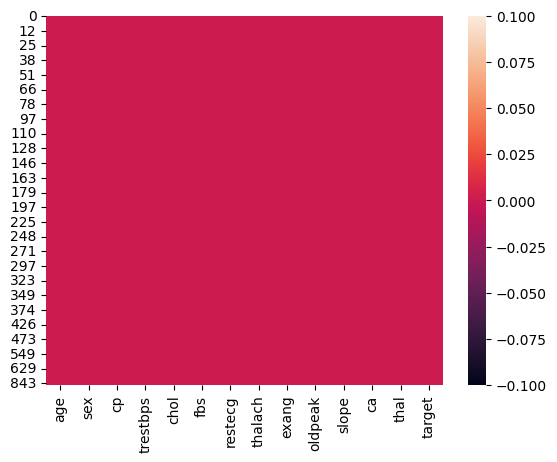

In [ ]:
sns.heatmap(heart_data.isnull(), cbar=True)

In [ ]:
heart_data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Axes: >

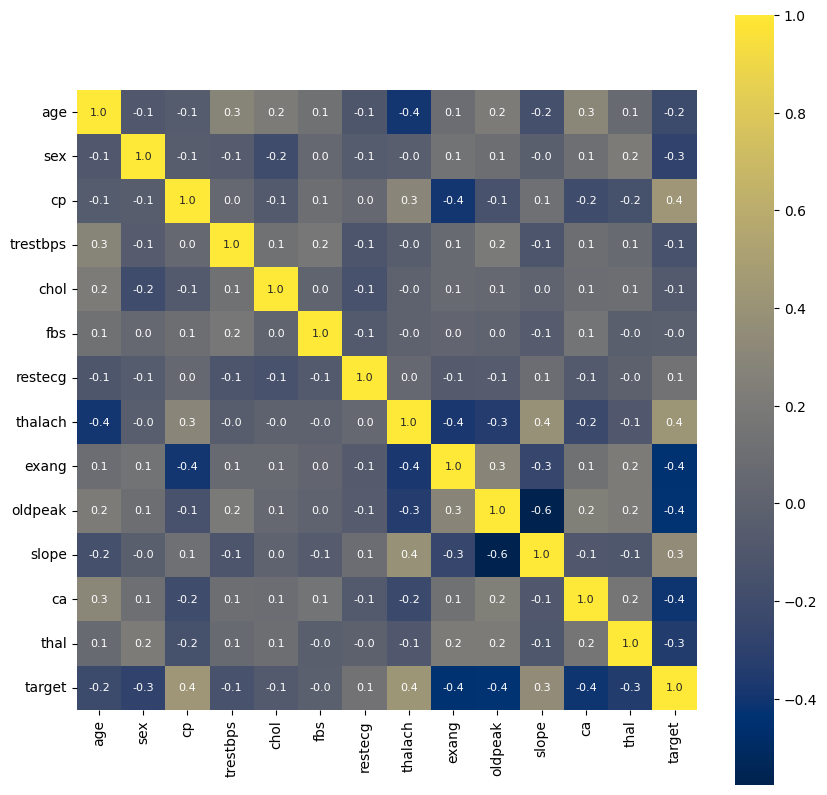

In [ ]:
#constructing a Heat Map
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='cividis')

In [ ]:
#statistical measures of the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of the Traget value
heart_data['target'].value_counts()

,count
target,
1,164
0,138


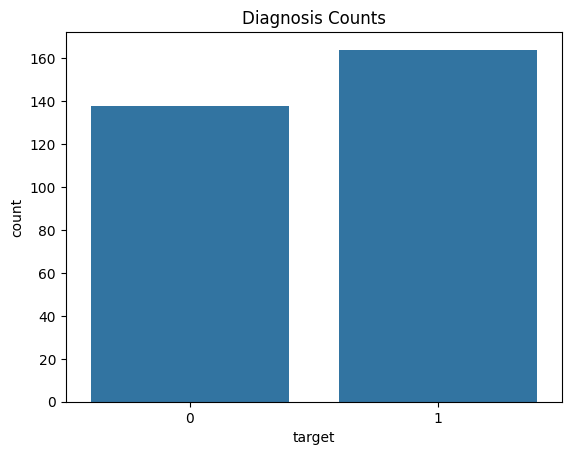

In [ ]:
sns.countplot(x='target', data=heart_data)
plt.title('Diagnosis Counts')
plt.show()

1------> Defective heart
0------> Healthy heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  
0        2   2     3  
1        0   0     3  
2        0   0    

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64


Splitting the Data into Training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify = Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (211, 13) (91, 13)


Model comparison

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:86.2559
--F1 Score:86.1245
--Precision:83.5938
--Recall:93.0435
--Roc Auc Score:85.5842
.............................................
Model performance for Test set
--Accuracy:84.6154
--F1 Score:84.6154
--Precision:85.7143
--Recall:85.7143
--Roc Auc Score:84.5238
Confusion Matrix :- 
[[35  7]
 [ 7 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.86      0.86      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



Support Vector Machine
Model performance for Training set
--Accuracy:63.9810
--F1 Score:61.3084
--Precision:62.1118
--Recall:86.9565
--Roc Auc Score:61.7074
.............................................
Model performance for Test set
--Accuracy:68.1319
--F1 Score:66.4444
-

We will apply GridsearchCV method for hyperparameter tuning

In [ ]:
# list of models
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

In [ ]:
#creating a dictionary that contains hyperparameter values for the above mentioned models

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20],
        'max_iter' : [1000,5000,10000],
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    'svc_hyperparameters': {
        'kernel' : ['linear', 'poly', 'rbf' , 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters' : {
        "max_depth" :[5,8,15,None,50,100],
        "max_features" : [5,8,15,None,"auto"],
        "min_samples_split" : [2,8,15,20],
        "n_estimators" : [10, 20,50,100]
    },
    'AdaBoost_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01, 0.1],
    },
    'GradientBoosting_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01],
    },
    'DecisionTree_hyperparameters' : {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }
}


In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters', 'AdaBoost_hyperparameters', 'GradientBoosting_hyperparameters', 'DecisionTree_hyperparameters']


In [ ]:
print(model_hyperparameters)

{'log_reg_hyperparameters': {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}, 'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, 'KNN_hyperparameters': {'n_neighbors': [3, 5, 10]}, 'random_forest_hyperparameters': {'max_depth': [5, 8, 15, None, 50, 100], 'max_features': [5, 8, 15, None, 'auto'], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [10, 20, 50, 100]}, 'AdaBoost_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01, 0.1]}, 'GradientBoosting_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01]}, 'DecisionTree_hyperparameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def ModelSelection(list_of_models, model_hyperparameters):
  model_param = {}
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i+=1

    classifier = GridSearchCV(model, params, cv=5)
    # fitting the data to classifier
    classifier.fit(X_train,Y_train)
    model_param[model] = classifier.best_params_
  for model_name in model_param:
    print(f"----Best params for {model_name}----")
    print(model_param[model_name])

In [ ]:
ModelSelection(models_list, model_hyperparameters)

----Best params for LogisticRegression()----
{'C': 1, 'max_iter': 10000, 'penalty': None, 'solver': 'sag'}
----Best params for SVC()----
{'C': 10, 'kernel': 'linear'}
----Best params for KNeighborsClassifier()----
{'n_neighbors': 3}
----Best params for RandomForestClassifier(random_state=0)----
{'max_depth': 5, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 100}
----Best params for AdaBoostClassifier()----
{'learning_rate': 0.1, 'n_estimators': 20}
----Best params for GradientBoostingClassifier()----
{'learning_rate': 0.01, 'n_estimators': 50}
----Best params for DecisionTreeClassifier()----
{'criterion': 'gini', 'splitter': 'random'}


Now we will apply best hyperparameters on all models and check evaluation report

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(C= 1, max_iter= 10000, penalty= None, solver= 'sag'),
    "Support Vector Machine" : SVC(C= 10, kernel= 'linear'),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 3),
    "AdaBoost" : AdaBoostClassifier(learning_rate= 0.1, n_estimators= 20),
    "Random Forest" : RandomForestClassifier(max_depth= 5, max_features= 5, min_samples_split= 20, n_estimators= 100),
    "Gradient Boosting" : GradientBoostingClassifier(learning_rate = 0.01, n_estimators= 50),
    "Decision Tree" : DecisionTreeClassifier(criterion= 'gini', splitter= 'random')
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:85.7820
--F1 Score:85.6307
--Precision:82.9457
--Recall:93.0435
--Roc Auc Score:85.0634
.............................................
Model performance for Test set
--Accuracy:85.7143
--F1 Score:85.7004
--Precision:86.0000
--Recall:87.7551
--Roc Auc Score:85.5442
Confusion Matrix :- 
[[35  7]
 [ 6 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.86      0.88      0.87        49

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



Support Vector Machine
Model performance for Training set
--Accuracy:85.3081
--F1 Score:85.1969
--Precision:83.3333
--Recall:91.3043
--Roc Auc Score:84.7147
.............................................
Model performance for Test set
--Accuracy:81.3187
--F1 Score:81.3323
-

Based on Accuracy score, Classification report and Confusion matrix, Random Forest is the best model.

Model Training

Random Forest

In [ ]:
model = RandomForestClassifier(max_depth= 5, max_features= 5, min_samples_split= 20, n_estimators= 100)

In [ ]:
# Training the LogisticRegression model with training data
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features=5, min_samples_split=20)

Model Evaluation

Accuracy score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data',training_data_accuracy*100)

Accuracy on training data 91.4691943127962


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on test data',test_data_accuracy*100)

Accuracy on test data 87.91208791208791


Confusion matrix and Classification report

Confusion Matrix :- 
[[37  5]
 [ 6 43]]



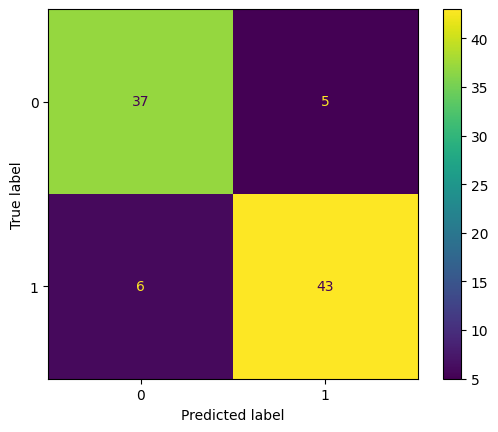

Classification Report :- 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87        42
           1       0.90      0.88      0.89        49

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, X_test_prediction)}\n")
cm = confusion_matrix(Y_test, X_test_prediction, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()
print(f"Classification Report :- \n {classification_report(Y_test, X_test_prediction)}")

Building prediction

In [ ]:
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print("The person does not have a heart disease")
else:
  print("The person has heart disease")

[0]
The person does not have a heart disease


Saved the training model

In [ ]:
import pickle
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename,'wb'))

In [ ]:
#loading the saved model
heart_disease_model = pickle.load(open('heart_disease_model.sav','rb'))

In [ ]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = heart_disease_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print("The person does not have a heart disease")
else:
  print("The person has heart disease")

[1]
The person has heart disease
